In [46]:
%run flood_helpers.ipynb
# .ipynb file with import packages and def functions to help clean up main notebook

# Load Data
### Source: 
FEMA's National Flood Insurance Policy Database [Kaggle](https://www.kaggle.com/datasets/lynma01/femas-national-flood-insurance-policy-database) <br/>
US Census Demographic Data [Kaggle](https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data)

### Load Flood Insurance Policy Data and Rename Columns

In [2]:
flood_policies = load_data("nfip-flood-policies.csv")
flood_policies.shape

(50406944, 45)

In [58]:
flood_policies

agriculturestructureindicator  basefloodelevation  \
0                                  NaN                 NaN   
1                                  NaN                 NaN   
2                                  NaN                 NaN   
3                                  NaN               519.0   
4                                  NaN                 7.0   
...                                ...                 ...   
50406939                             N                 8.0   
50406940                             N                 NaN   
50406941                             N                 NaN   
50406942                             N                 1.0   
50406943                                              NaN   

          basementenclosurecrawlspacetype cancellationdateoffloodpolicy  \
0                                     2.0                           NaN   
1                                     0.0                           NaN   
2                                     0.0                           NaN   
3                                     2.0                    2016-04-01   
4                                     0.0                           NaN   
...                                   ...                           ...   
50406939                              1.0                           NaN   
50406940                              0.0                           NaN   
50406941                              0.0                           NaN   
50406942                              0.0                           NaN   
50406943                              NaN                           NaN   

           censustract condominiumindicator construction  countycode  \
0         3.301304e+10                    N            N     33013.0   
1         2.206304e+10                    N            N     22063.0   
2         4.505106e+10                    N            N     45051.0   
3         1.055001e+09                    N            N      1055.0   
4         1.208600e+10                    N            N     12086.0   
...                ...                  ...          ...         ...   
50406939           NaN                    N            N     37031.0   
50406940  3.902504e+10                    N            N     39025.0   
50406941  6.059063e+09                    N            N      6059.0   
50406942  4.013217e+09                    N            N      4013.0   
50406943           NaN                  NaN          NaN         NaN   

          crsdiscount deductibleamountinbuildingcoverage  \
0                0.00                                  0   
1                0.05                                  1   
2                0.00                                  0   
3                0.00                                  1   
4                0.00                                  0   
...               ...                                ...   
50406939         0.00                                  F   
50406940         0.00                                  F   
50406941         0.00                                  F   
50406942         0.25                                  5   
50406943          NaN                                NaN   

         deductibleamountincontentscoverage elevatedbuildingindicator  \
0                                         0                         N   
1                                         1                         N   
2                                         0                         N   
3                                         1                         Y   
4                                         0                         N   
...                                     ...                       ...   
50406939                                  0                         Y   
50406940                                  F                         N   
50406941                                  F                         N   
50406942                                  5    

In [4]:
policies_df = rename_flood_columns(flood_policies)
for col in policies_df.columns:
    print(col)

agriculture_structure_indicator
base_flood_elevation
basement_enclosure_crawlspace_type
cancellation_date_of_flood_policy
census_tract
condominium_indicator
construction
county_code
crs_discount
deductible_amount_in_building_coverage
deductible_amount_in_contents_coverage
elevated_building_indicator
elevation_certificate_indicator
elevation_difference
federal_policy_fee
flood_zone
hfiaa_surcharge
house_of_worship_indicator
latitude
location_of_contents
longitude
lowest_adjacent_grade
lowest_floor_elevation
non_profit_indicator
number_of_floors_in_insured_building
obstruction_type
occupancy_type
original_construction_date
original_nb_date
policy_cost
policy_count
policy_effective_date
policy_termination_date
policy_term_indicator
post_firm_construction_indicator
primary_residence_indicator
property_state
reported_zipcode
rate_method
regular_emergency_program_indicator
reported_city
small_business_indicator_building
total_building_insurance_coverage
total_contents_insurance_coverage
tota

### Create New Feature
Premium Rate = Total Premium / Total Coverage (Building and Contents)

In [ ]:
total_coverage = policies_df['total_building_insurance_coverage'] + policies_df['total_contents_insurance_coverage']
premium = policies_df['total_insurance_premium_of_the_policy']

# Use Where numpy feature to take care of division by zero
policies_df['premium_rate'] = np.where(total_coverage == 0,
                                            np.nan,
                                            premium / total_coverage)

### Load Census Demographic Data and Rename Columns

In [6]:
census_df = load_data("acs2015_census_tract_data.csv")

In [7]:
census_df.shape

(74001, 37)

In [59]:
census_df

census_tract        state   county  total_pop   men  women  hispanic  \
0        1001020100      Alabama  Autauga       1948   940   1008       0.9   
1        1001020200      Alabama  Autauga       2156  1059   1097       0.8   
2        1001020300      Alabama  Autauga       2968  1364   1604       0.0   
3        1001020400      Alabama  Autauga       4423  2172   2251      10.5   
4        1001020500      Alabama  Autauga      10763  4922   5841       0.7   
...             ...          ...      ...        ...   ...    ...       ...   
73996   72153750501  Puerto Rico    Yauco       6205  3291   2914      99.7   
73997   72153750502  Puerto Rico    Yauco       2122   921   1201      99.2   
73998   72153750503  Puerto Rico    Yauco       2277  1097   1180      99.5   
73999   72153750601  Puerto Rico    Yauco       5267  2663   2604      98.8   
74000   72153750602  Puerto Rico    Yauco       2741  1181   1560      99.3   

       white  black  native  asian  pacific  citizen   income  income_err  \
0       87.4    7.7     0.3    0.6      0.0     1503  61838.0     11900.0   
1       40.4   53.3     0.0    2.3      0.0     1662  32303.0     13538.0   
2       74.5   18.6     0.5    1.4      0.3     2335  44922.0      5629.0   
3       82.8    3.7     1.6    0.0      0.0     3306  54329.0      7003.0   
4       68.5   24.8     0.0    3.8      0.0     7666  51965.0      6935.0   
...      ...    ...     ...    ...      ...      ...      ...         ...   
73996    0.3    0.0     0.0    0.0      0.0     4354  21188.0      3599.0   
73997    0.3    0.0     0.0    0.5      0.0     1466  25781.0      7874.0   
73998    0.4    0.0     0.0    0.2      0.0     1741  17284.0      3507.0   
73999    1.2    0.0     0.0    0.0      0.0     3938  22083.0      9813.0   
74000    0.7    0.0     0.0    0.0      0.0     2445   7953.0      2513.0   

       income_per_cap  income_per_cap_err  poverty  child_poverty  \
0             25713.0              4548.0      8.1            8.4   
1             18021.0              2474.0     25.5           40.3   
2             20689.0              2817.0     12.7           19.7   
3             24125.0              2870.0      2.1            1.6   
4             27526.0              2813.0     11.4           17.5   
...               ...                 ...      ...            ...   
73996          8474.0              1489.0     40.7           59.9   
73997         10788.0              2216.0     32.8           28.0   
73998          8524.0              1840.0     56.6           83.5   
73999          9907.0              1898.0     39.9           34.6   
74000          4806.0              1351.0     76.8           75.3   

       professional  service  office  construction  production  drive  \
0              34.7     17.0    21.3          11.9        15.2   90.2   
1              22.3     24.7    21.5           9.4        22.0   86.3   
2              31.4     24.9    22.1           9.2        12.4   94.8   
3              27.0     20.8    27.0           8.7        16.4   86.6   
4              49.6     14.2    18.2           2.1        15.8   88.0   
...             ...      ...     ...           ...         ...    ...   
73996          32.9     19.2    26.8          11.1        10.1   81.0   
73997          36.6     13.0    20.9          20.5         9.1   92.4   
73998          21.0     32.6    29.7           3.1        13.6   84.3   
73999          36.7     18.6    23.9          10.2        10.7   93.5   
74000          25.2     24.0    20.6          14.3        15.9   71.1   

       carpool  transit  walk  other_transp  work_at_home  mean_commute  \
0          4.8      0.0   0.5           2.3           2.1          25.0   
1         13.1      0.0   0.0           0.7           0.0          23.4   
2          2.8      0.0   0.0           0.0           2.5          19.6   
3          9.1      0.0   0.0           2.6           1.6          25.3   
4         10.5      0.0   0.0           0.6         

In [ ]:
# Uses helper function using Re to rename columns from PascalCase to snake_case
census_df = census_df.rename(columns=pascal_to_snake)
for col in census_df.columns:
    print(col)

census_tract
state
county
total_pop
men
women
hispanic
white
black
native
asian
pacific
citizen
income
income_err
income_per_cap
income_per_cap_err
poverty
child_poverty
professional
service
office
construction
production
drive
carpool
transit
walk
other_transp
work_at_home
mean_commute
employed
private_work
public_work
self_employed
family_work
unemployment


### Subset Census Data
Select only Census Tract, Total Population, and Poverty

In [10]:
census_subset = census_df[["census_tract", "total_pop", "poverty"]]
census_subset.head()

census_tract  total_pop  poverty
0    1001020100       1948      8.1
1    1001020200       2156     25.5
2    1001020300       2968     12.7
3    1001020400       4423      2.1
4    1001020500      10763     11.4

### Clean Census Dataset

Percent Census dataset is NA

In [ ]:
(census_subset.isna().sum()/len(census_subset)).sort_values()

census_tract    0.000000
total_pop       0.000000
poverty         0.011284
dtype: float64

In [ ]:
census_na_count = census_subset.isna().sum().sum()
print("Census Missing Values Dropped:", census_na_count)
census_cleaned = census_subset.dropna()

Census NA Dropped: 835


In [55]:
census_dup_count = census_cleaned.duplicated().sum()
print("Census Duplicates Dropped:", census_dup_count)
census_cleaned = census_cleaned.drop_duplicates()

Census Duplicates Dropped: 0


### Clean Flood Insurance Policy Dataset

In [ ]:
policies_dup_count = policies_df.duplicated().sum()
print("Policy Duplicases Dropped:", policies_dup_count)
policies_df = policies_df.drop_duplicates().copy()

Policy Duplicases: 0


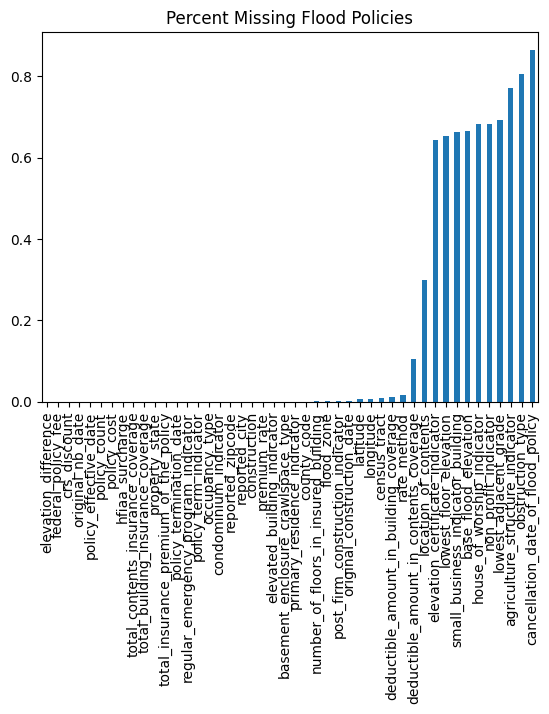

In [ ]:
plt.figure()
(policies_df.isna().sum()/len(policies_df)).sort_values().plot(kind="bar")
plt.title("Percent Missing Values Flood Policies")
plt.show()

Select Subset of Columns

In [17]:
df_subset = flood_subset(policies_df).copy()

Fill Columns with large percentage of Missing Values with "Unknown" value.

In [18]:
col_to_fill = ['small_business_indicator_building', 'obstruction_type', 
                  'non_profit_indicator', 'house_of_worship_indicator', 'agriculture_structure_indicator',
                  'cancellation_date_of_flood_policy']

df_subset[col_to_fill] = df_subset[col_to_fill].fillna("Unknown")

<Axes: >

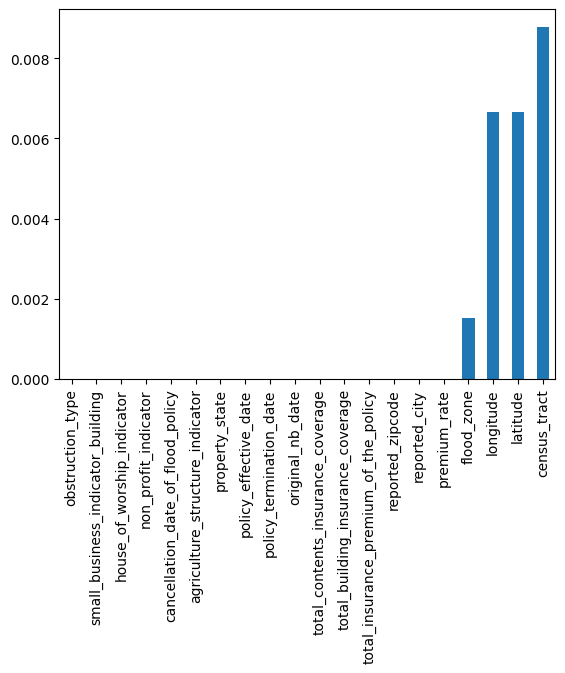

In [ ]:
plt.figure()
(df_subset.isna().sum()/len(df_subset)).sort_values().plot(kind="bar")
plt.title("Percent Missing Values Flood Policies")
plt.show()

In [60]:
policies_na_count = df_subset.isna().sum().sum()
print("Policy Missing Values Dropped:", policies_na_count)
policies_cleaned = df_subset.dropna().copy()

Policy Missing Values Dropped: 1170143


Verify Data Type

In [ ]:
# errors handles the "Unknown" filled in earlier for cancellation date. Fills with NA.
policies_cleaned['cancellation_date_of_flood_policy'] = pd.to_datetime(policies_cleaned['cancellation_date_of_flood_policy'], errors='coerce')
policies_cleaned['original_nb_date'] = pd.to_datetime(policies_cleaned['original_nb_date'])
policies_cleaned['policy_effective_date'] = pd.to_datetime(policies_cleaned['policy_effective_date'])
policies_cleaned['policy_termination_date'] = pd.to_datetime(policies_cleaned['policy_termination_date'])
policies_cleaned['census_tract'] = policies_cleaned['census_tract'].astype(str) # shouldnt be float since catagorical
policies_cleaned.info()

C:\Users\Hobbs\AppData\Local\Temp\ipykernel_26320\586404736.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  policies_cleaned['cancellation_date_of_flood_policy'] = pd.to_datetime(policies_cleaned['cancellation_date_of_flood_policy'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 48970763 entries, 0 to 50406942
Data columns (total 20 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   flood_zone                             object        
 1   latitude                               float64       
 2   longitude                              float64       
 3   property_state                         object        
 4   reported_city                          object        
 5   small_business_indicator_building      object        
 6   obstruction_type                       object        
 7   reported_zipcode                       object        
 8   census_tract                           float64       
 9   non_profit_indicator                   object        
 10  house_of_worship_indicator             object        
 11  agriculture_structure_indicator        object        
 12  cancellation_date_of_flood_policy      datetime64[ns]
 13  

## FEMA Flood Zoon Designations

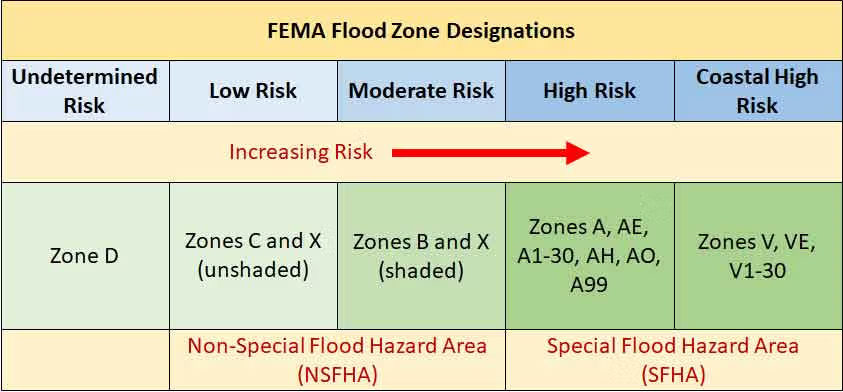

In [22]:
img = Image.open('flood_zones.avif')
display(img)

In [23]:
policies_cleaned['flood_zone'].unique()

array(['X', 'AE', 'A10', 'A02', 'A06', 'A08', 'C', 'B', 'AHB', 'VE', 'A',
       'A01', 'V14', 'A05', 'AO', 'AH', 'A04', 'A07', 'A14', 'A12', 'A15',
       'A13', 'A03', 'AOB', 'A17', 'A11', 'V12', 'D', 'A09', 'V10', 'A16',
       'A99', 'V20', 'A18', 'V06', 'A20', 'V19', 'A28', 'V09', 'V15',
       'V01', 'AR', 'V11', 'V13', 'V21', 'A22', 'V05', 'A19', 'A23',
       'A21', 'V08', 'V17', 'V04', 'A0B', 'V', 'V16', 'V18', 'V07', 'V02',
       'V03', 'V27', 'A27', 'A30', 'V23', 'V22', 'A24', 'V24', 'A25',
       'A26', 'V30', 'A29', 'A00', 'V29', 'V28', 'ALT', '*', 'V8', 'A0',
       'EMG', 'V9', 'ARE', 'X 0', 'A E', 'AO8', 'E', '00X'], dtype=object)

## Creates new Columns for different Flood Zone Destinations
Combined Moderate and Low as X is in both
Handled extra values need to be filtered, 'EMG' '00X' and '*'

In [ ]:
mask = policies_cleaned['flood_zone'].str.contains('^A')
policies_cleaned['high_flood_zone'] = False
policies_cleaned.loc[mask, 'high_flood_zone'] = True
mask = policies_cleaned['flood_zone'].str.contains('^V')
policies_cleaned['coastal_high_flood_zone'] = False
policies_cleaned.loc[mask, 'coastal_high_flood_zone'] = True
mask = policies_cleaned['flood_zone'].str.contains('^[BCX0]')
policies_cleaned['low_moderate_flood_zone'] = False
policies_cleaned.loc[mask, 'low_moderate_flood_zone'] = True
mask = policies_cleaned['flood_zone'].str.contains('^[*DEn]')
policies_cleaned['undetermined_flood_zone'] = False
policies_cleaned.loc[mask, 'undetermined_flood_zone'] = True
policies_cleaned

flood_zone  latitude  longitude property_state   reported_city  \
0          X      43.3      -71.8             NH          WARNER   
1         AE      30.5      -91.0             LA  DENHAM SPRINGS   
2          X      33.7      -79.0             SC    MYRTLE BEACH   
3         AE      34.0      -86.0             AL         GADSDEN   
4        A10      26.0      -80.1             FL    GOLDEN BEACH   

  small_business_indicator_building obstruction_type reported_zipcode  \
0                           Unknown          Unknown            03278   
1                           Unknown          Unknown            70726   
2                           Unknown          Unknown            29579   
3                           Unknown               50            35901   
4                           Unknown          Unknown            33160   

   census_tract non_profit_indicator house_of_worship_indicator  \
0  3.301304e+10              Unknown                    Unknown   
1  2.206304e+10              Unknown                    Unknown   
2  4.505106e+10              Unknown                    Unknown   
3  1.055001e+09              Unknown                    Unknown   
4  1.208600e+10              Unknown                    Unknown   

  agriculture_structure_indicator cancellation_date_of_flood_policy  \
0                         Unknown                               NaT   
1                         Unknown                               NaT   
2                         Unknown                               NaT   
3                         Unknown                        2016-04-01   
4                         Unknown                               NaT   

  original_nb_date policy_effective_date policy_termination_date  \
0       2008-08-19            2009-08-19              2010-08-19   
1       1997-10-04            2009-10-04              2010-10-04   
2       2005-08-13            2009-08-13              2010-08-13   
3       2006-04-14            2009-04-14              2010-04-14   
4       1996-04-04            2009-04-04              2010-04-04   

   total_building_insurance_coverage  total_contents_insurance_coverage  \
0                           250000.0                           100000.0   
1                            16400.0                             8800.0   
2                           250000.0                           100000.0   
3                           174900.0                            21000.0   
4                           250000.0                           100000.0   

   total_insurance_premium_of_the_policy  premium_rate  high_flood_zone  \
0                                  375.0      0.001071            False   
1                                  280.0      0.011111             True   
2                                  335.0      0.000957            False   
3                                  916.0      0.004676             True   
4                                 1288.0      0.003680             True   

   coastal_high_flood_zone  low_moderate_flood_zone  undetermined_flood_zone  
0                    False                     True                    False  
1                    False                    False                    False  
2                    False                     True                    False  
3                    False                    False                    False  
4                    False                    False                    False

# Merge Datasets
Merge Cleaned Census and Polices Datasets

In [28]:
df_merged = pd.merge(policies_cleaned, census_subset, how = "left", on = "census_tract")
df_merged.shape

(48970763, 26)

# Describe Cleaned Dataset

In [ ]:
df_merged.describe()

latitude     longitude  census_tract  \
count  4.897076e+07  4.897076e+07  4.897076e+07   
mean   3.261875e+01 -8.786587e+01  2.599405e+10   
min   -1.430000e+01 -1.707000e+02  1.003000e+03   
25%    2.820000e+01 -9.420000e+01  1.208600e+10   
50%    3.030000e+01 -8.260000e+01  2.205702e+10   
75%    3.770000e+01 -8.020000e+01  4.200345e+10   
max    6.690000e+01  1.458000e+02  7.803096e+10   
std    5.732111e+00  1.327884e+01  1.571563e+10   

      cancellation_date_of_flood_policy               original_nb_date  \
count                           6690746                       48970763   
mean      2015-11-11 15:15:58.090473216  2009-05-03 20:29:42.061479680   
min                 1985-06-19 00:00:00            1984-03-09 00:00:00   
25%                 2014-04-04 00:00:00            2006-06-29 00:00:00   
50%                 2016-03-31 00:00:00            2010-07-09 00:00:00   
75%                 2017-08-24 00:00:00            2013-03-22 00:00:00   
max                 2045-06-04 00:00:00            2019-12-08 00:00:00   
std                                 NaN                            NaN   

               policy_effective_date        policy_termination_date  \
count                       48970763                       48970763   
mean   2014-03-13 01:43:46.066600960  2015-02-11 11:39:58.053937664   
min              2009-01-01 00:00:00            2009-01-02 00:00:00   
25%              2011-07-14 00:00:00            2012-06-18 00:00:00   
50%              2014-02-05 00:00:00            2014-12-27 00:00:00   
75%              2016-10-20 00:00:00            2017-09-26 00:00:00   
max              2020-09-16 00:00:00            2020-12-26 00:00:00   
std                              NaN                            NaN   

       total_building_insurance_coverage  total_contents_insurance_coverage  \
count                       4.897076e+07                       4.897076e+07   
mean                        2.371771e+05                       5.719579e+04   
min                         0.000000e+00                       0.000000e+00   
25%                         1.355000e+05                       3.000000e+03   
50%                         2.500000e+05                       5.450000e+04   
75%                         2.500000e+05                       1.000000e+05   
max                         2.497500e+08                       6.000000e+06   
std                         1.011011e+06                       5.919557e+04   

       total_insurance_premium_of_the_policy  premium_rate  
count                           4.897076e+07  4.897076e+07  
mean                            7.771468e+02  3.748221e-03  
min                            -5.928000e+03 -3.660377e-01  
25%                             3.340000e+02  1.120000e-03  
50%                             3.900000e+02  1.625000e-03  
75%                             7.860000e+02  5.128000e-03  
max                             1.061158e+06  2.549500e+01  
std                             1.647318e+03  8.320205e-03

In [ ]:
df_merged.describe(include=("object","bool"))

flood_zone property_state reported_city  \
count    48970763       48970763      48970763   
unique         86             56         40590   
top             X             FL       HOUSTON   
freq     17742900       14637848       1978232   

       small_business_indicator_building obstruction_type reported_zipcode  \
count                           48970763         48970763         48970763   
unique                                 3               24            32830   
top                              Unknown          Unknown            70065   
freq                            32596825         39512130           161185   

       non_profit_indicator house_of_worship_indicator  \
count              48970763                   48970763   
unique                    3                         14   
top                 Unknown                    Unknown   
freq               33613704                   33598426   

       agriculture_structure_indicator high_flood_zone  \
count                         48970763        48970763   
unique                               3               2   
top                            Unknown            True   
freq                          37995063        26346197   

       coastal_high_flood_zone low_moderate_flood_zone undetermined_flood_zone  
count                 48970763                48970763                48970763  
unique                       2                       2                       2  
top                      False                   False                   False  
freq                  48443471                26903182                48941070

## State Counts

In [ ]:
state_count = df_merged['property_state'].value_counts()
state_count

property_state
FL    14637848
TX     7025648
LA     5414839
CA     2681379
NJ     2032934
        ...   
DC       16364
VI        7049
GU        2367
CM          98
AS          64
Name: count, Length: 56, dtype: int64

## Absolute Correlation Map

Text(0.5, 1.0, 'Correlation Map for Absolute Value of Correlation')

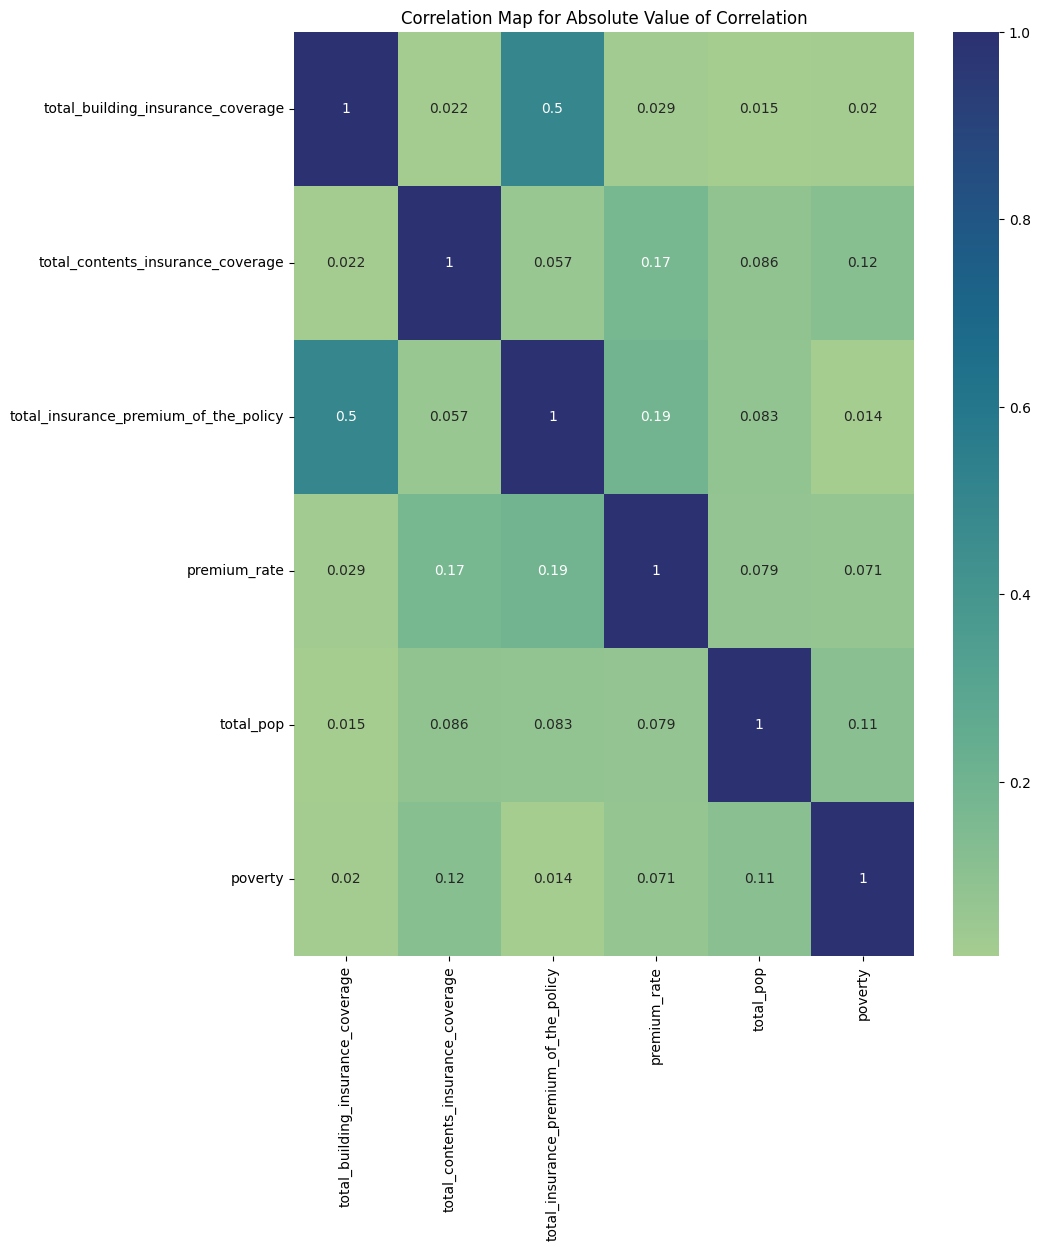

In [29]:
df_numeric = df_merged[["total_building_insurance_coverage", "total_contents_insurance_coverage",
                         "total_insurance_premium_of_the_policy", "premium_rate", "total_pop", "poverty"]]
correlation_matrix = df_numeric.corr().abs()
plt.figure(figsize=(10,12))
sns.heatmap(correlation_matrix, cmap= "crest", annot=True)
plt.title("Correlation Map for Absolute Value of Correlation")

# Create Subsets
Create State Subsets for Michigan and Flordia

In [ ]:
df_michigan = df_merged[df_merged['property_state'] == 'MI']
df_michigan

flood_zone  latitude  longitude property_state  reported_city  \
416           C      43.1      -86.2             MI    SPRING LAKE   
628           X      42.3      -83.3             MI  DEARBORN HGTS   
755           C      42.1      -86.4             MI   SAINT JOSEPH   
1150         AE      42.8      -86.2             MI       MACATAWA   
1337         AE      42.3      -83.8             MI      ANN ARBOR   
1564          B      41.8      -83.5             MI           ERIE   
1779         AE      41.8      -83.6             MI     TEMPERANCE   
2582          A      43.8      -83.4             MI      SEBEWAING   
2714          X      43.4      -84.1             MI        SAGINAW   
2757          B      42.6      -82.8             MI   HARRISON TWP   

     small_business_indicator_building obstruction_type reported_zipcode  \
416                            Unknown          Unknown            49456   
628                            Unknown          Unknown            48125   
755                            Unknown               10            49085   
1150                           Unknown          Unknown            49434   
1337                           Unknown          Unknown            48103   
1564                           Unknown               10            48133   
1779                           Unknown          Unknown            48182   
2582                           Unknown          Unknown            48759   
2714                           Unknown          Unknown            48609   
2757                           Unknown          Unknown            48045   

      census_tract non_profit_indicator house_of_worship_indicator  \
416   2.613902e+10              Unknown                    Unknown   
628   2.616357e+10              Unknown                    Unknown   
755   2.602100e+10              Unknown                    Unknown   
1150  2.613902e+10              Unknown                    Unknown   
1337  2.616140e+10              Unknown                    Unknown   
1564  2.611583e+10              Unknown                    Unknown   
1779  2.611583e+10              Unknown                    Unknown   
2582  2.606395e+10              Unknown                    Unknown   
2714  2.614501e+10              Unknown                    Unknown   
2757  2.609925e+10              Unknown                    Unknown   

     agriculture_structure_indicator cancellation_date_of_flood_policy  \
416                          Unknown                               NaT   
628                          Unknown                               NaT   
755                          Unknown                        2010-06-16   
1150                         Unknown                               NaT   
1337                         Unknown                               NaT   
1564                         Unknown                               NaT   
1779                         Unknown                               NaT   
2582                         Unknown                               NaT   
2714                         Unknown                               NaT   
2757                         Unknown                               NaT   

     original_nb_date policy_effective_date policy_termination_date  \
416        2007-09-06            2009-09-06              2010-09-06   
628        1999-08-18            2009-01-12              2010-01-12   
755        1997-06-16            2009-06-16              2010-06-16   
1150       2007-07-20            2009-07-20              2010-07-20   
1337       2008-04-08            2009-04-08              2010-04-08   
1564       1997-11-30            2009-11-30              2010-11-30   
1779       2004-07-10            2009-07-10              2010-07-10   
2582       2007-02-05            2009-02-05              2010-02-05   
2714       2002-09-17            2009-09-17              2010-09-17   
2757       2007-04-17            2009-04-17              2010-04-17   

      total_building_insuranc

In [ ]:
df_flordia = df_merged[df_merged['property_state'] == 'FL']
df_flordia

flood_zone  latitude  longitude property_state  reported_city  \
4         A10      26.0      -80.1             FL   GOLDEN BEACH   
9           X      28.0      -82.6             FL          TAMPA   
11         AE      27.8      -80.5             FL      SEBASTIAN   
17          C      27.4      -82.5             FL  UNIVERSITY PK   
19          X      30.5      -84.2             FL    TALLAHASSEE   
30          B      26.3      -80.2             FL  POMPANO BEACH   
34         AE      25.5      -80.4             FL      HOMESTEAD   
36        AHB      26.2      -80.2             FL        MARGATE   
39        A10      26.4      -82.1             FL        SANIBEL   
40        AHB      25.8      -80.4             FL     SWEETWATER   

   small_business_indicator_building obstruction_type reported_zipcode  \
4                            Unknown          Unknown            33160   
9                            Unknown          Unknown            33607   
11                           Unknown          Unknown            32958   
17                           Unknown          Unknown            34201   
19                           Unknown          Unknown            32308   
30                           Unknown          Unknown            33069   
34                           Unknown          Unknown            33033   
36                           Unknown          Unknown            33063   
39                           Unknown               10            33957   
40                           Unknown          Unknown            33174   

    census_tract non_profit_indicator house_of_worship_indicator  \
4   1.208600e+10              Unknown                    Unknown   
9   1.205701e+10              Unknown                    Unknown   
11  1.206105e+10              Unknown                    Unknown   
17  1.208100e+10              Unknown                    Unknown   
19  1.207300e+10              Unknown                    Unknown   
30  1.201103e+10              Unknown                    Unknown   
34  1.208601e+10              Unknown                    Unknown   
36  1.201102e+10              Unknown                    Unknown   
39  1.207108e+10              Unknown                    Unknown   
40  1.208601e+10              Unknown                    Unknown   

   agriculture_structure_indicator cancellation_date_of_flood_policy  \
4                          Unknown                               NaT   
9                          Unknown                               NaT   
11                         Unknown                               NaT   
17                         Unknown                               NaT   
19                         Unknown                               NaT   
30                         Unknown                        2010-08-05   
34                         Unknown                               NaT   
36                         Unknown                               NaT   
39                         Unknown                               NaT   
40                         Unknown                               NaT   

   original_nb_date policy_effective_date policy_termination_date  \
4        1996-04-04            2009-04-04              2010-04-04   
9        2007-09-13            2009-09-13              2010-09-13   
11       2009-12-01            2009-12-01              2010-12-01   
17       2003-05-20            2009-05-20              2010-05-20   
19       2007-07-06            2009-07-06              2010-07-06   
30       2009-11-23            2009-11-23              2010-08-05   
34       2009-03-31            2009-03-31              2010-03-31   
36       2008-05-06            2009-05-06              2010-05-06   
39       2006-02-24            2009-02-24              2010-02-24   
40       2009-12-03            2009-12-03              2009-12-20   

    total_building_insurance_coverage  total_contents_insurance_coverage  \
4                            250000.0                        

# Flood Zones
Explore different Flood Zones distrubutions for All US vs MI vs FL

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone US')

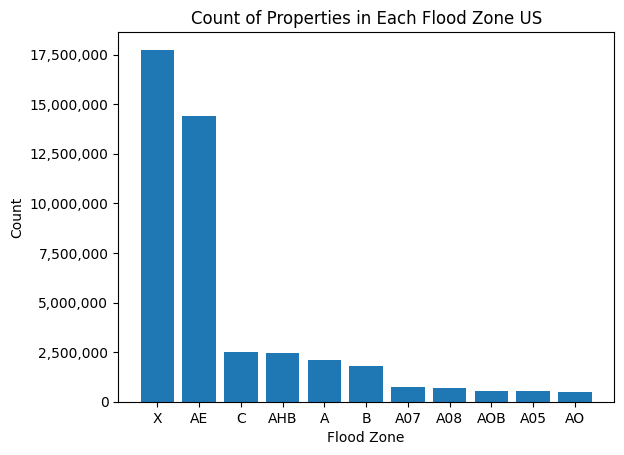

In [32]:
floodzone_counts = df_merged['flood_zone'].value_counts()

labels = floodzone_counts[:11].index
heights = floodzone_counts[:11].values
ax = plt.gca()
plt.bar(labels, heights)
plt.xlabel("Flood Zone")
plt.ylabel("Count")
ax.yaxis.set_major_formatter('{:,.0f}'.format)
plt.title("Count of Properties in Each Flood Zone US")

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone Level US')

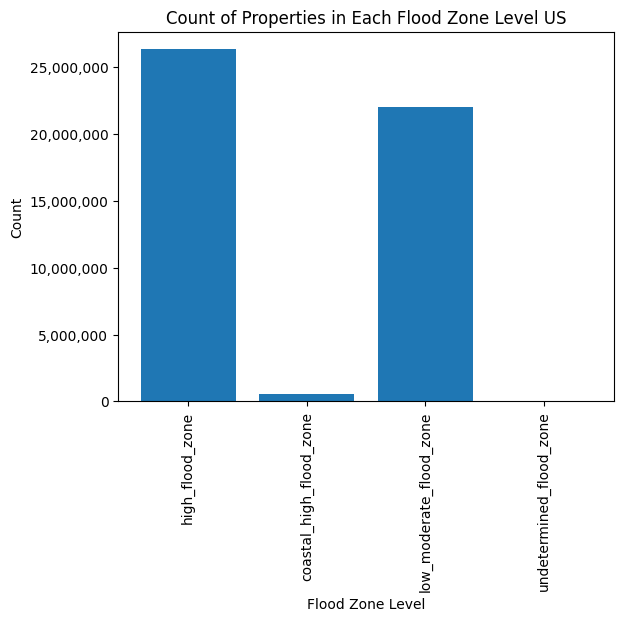

In [33]:
floodzone_types = ["high_flood_zone","coastal_high_flood_zone","low_moderate_flood_zone","undetermined_flood_zone"]
floodzone_counts = df_merged[floodzone_types].sum()
labels = floodzone_counts.index
heights = floodzone_counts.values
ax = plt.gca()
plt.bar(labels, heights)
plt.xticks(rotation = 90)
plt.xlabel("Flood Zone Level")
plt.ylabel("Count")
ax.yaxis.set_major_formatter('{:,.0f}'.format)
plt.title("Count of Properties in Each Flood Zone Level US")

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone MI')

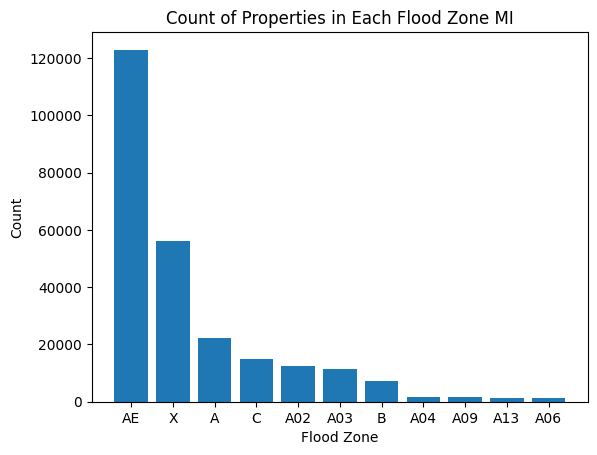

In [34]:
floodzone_counts = df_michigan['flood_zone'].value_counts()

labels = floodzone_counts[:11].index
heights = floodzone_counts[:11].values

plt.bar(labels, heights)
plt.xlabel("Flood Zone")
plt.ylabel("Count")
plt.title("Count of Properties in Each Flood Zone MI")

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone Level MI')

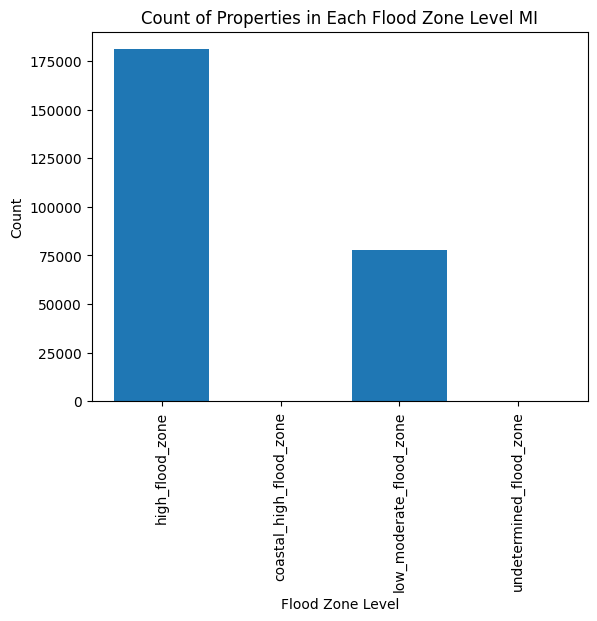

In [35]:
floodzone_counts = df_michigan[floodzone_types].sum()
labels = floodzone_counts.index
heights = floodzone_counts.values
plt.bar(labels, heights)
plt.xticks(rotation = 90)
plt.xlabel("Flood Zone Level")
plt.ylabel("Count")
plt.title("Count of Properties in Each Flood Zone Level MI")

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone FL')

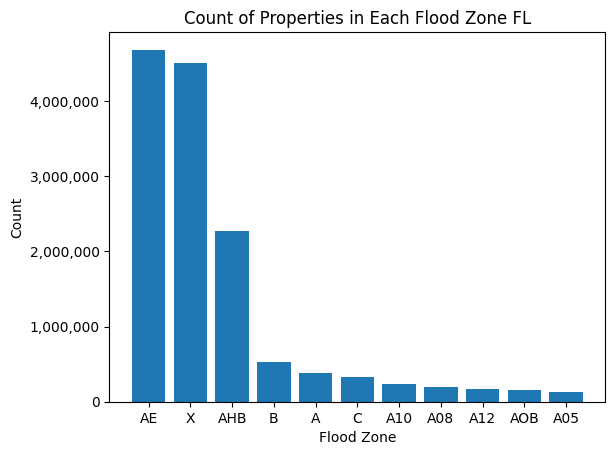

In [36]:
floodzone_counts = df_flordia['flood_zone'].value_counts()

labels = floodzone_counts[:11].index
heights = floodzone_counts[:11].values
ax = plt.gca()
plt.bar(labels, heights)
plt.xlabel("Flood Zone")
plt.ylabel("Count")
ax.yaxis.set_major_formatter('{:,.0f}'.format)
plt.title("Count of Properties in Each Flood Zone FL")

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone Level FL')

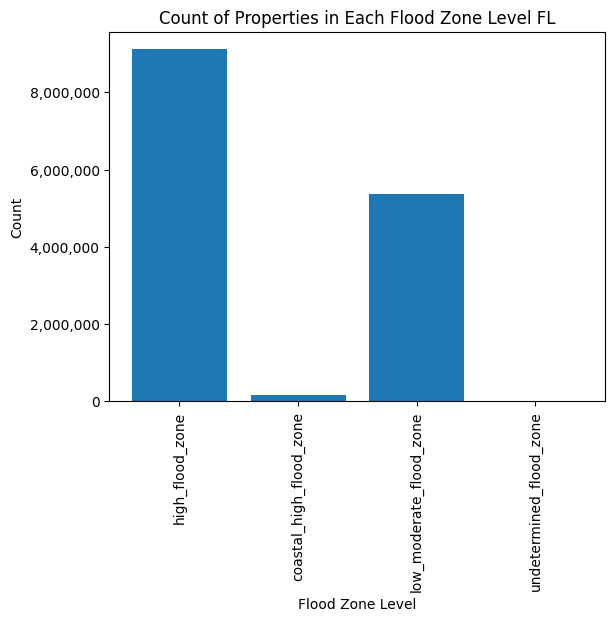

In [37]:
floodzone_counts = df_flordia[floodzone_types].sum()
labels = floodzone_counts.index
heights = floodzone_counts.values
ax = plt.gca()
plt.bar(labels, heights)
plt.xticks(rotation = 90)
plt.xlabel("Flood Zone Level")
plt.ylabel("Count")
ax.yaxis.set_major_formatter('{:,.0f}'.format)
plt.title("Count of Properties in Each Flood Zone Level FL")

# Sample Dataset
Created a sample Dataframe with 5000 rows from Flordia and 5000 rows from Michigan.

In [38]:
fl_sample = df_flordia.sample(n= 5000, random_state=42)
mi_sample = df_michigan.sample(n = 5000, random_state=42)
df_sample = pd.concat([fl_sample, mi_sample])
df_sample

flood_zone  latitude  longitude property_state     reported_city  \
28384293         VE      26.4      -82.0             FL           SANIBEL   
15928490         AE      26.6      -81.9             FL        FORT MYERS   
7405788          AE      25.9      -80.2             FL             MIAMI   
4675649         A11      28.9      -82.6             FL     CRYSTAL RIVER   
37907348          X      26.1      -80.2             FL   FORT LAUDERDALE   
...             ...       ...        ...            ...               ...   
28771497          X      42.5      -83.0             MI            WARREN   
1234631          AE      43.4      -84.1             MI           SAGINAW   
42652691         AE      43.6      -83.7             MI            MUNGER   
20691643         AE      42.5      -83.3             MI  FARMINGTON HILLS   
26543413          C      43.7      -83.9             MI          BAY CITY   

         small_business_indicator_building obstruction_type reported_zipcode  \
28384293                           Unknown          Unknown            33957   
15928490                           Unknown          Unknown            33919   
7405788                            Unknown          Unknown            33162   
4675649                            Unknown          Unknown            34429   
37907348                                 N          Unknown            33312   
...                                    ...              ...              ...   
28771497                           Unknown          Unknown            48088   
1234631                            Unknown          Unknown            48609   
42652691                                 N          Unknown            48747   
20691643                           Unknown          Unknown            48336   
26543413                           Unknown          Unknown            48706   

          census_tract non_profit_indicator house_of_worship_indicator  \
28384293  1.207108e+10              Unknown                    Unknown   
15928490  1.207100e+10              Unknown                    Unknown   
7405788   1.208600e+10              Unknown                    Unknown   
4675649   1.201745e+10              Unknown                    Unknown   
37907348  1.201104e+10                    N                          N   
...                ...                  ...                        ...   
28771497  2.609926e+10              Unknown                    Unknown   
1234631   2.614501e+10              Unknown                    Unknown   
42652691  2.601729e+10                    N                          N   
20691643  2.612517e+10              Unknown                    Unknown   
26543413  2.601729e+10              Unknown                    Unknown   

         agriculture_structure_indicator cancellation_date_of_flood_policy  \
28384293                         Unknown                               NaT   
15928490                         Unknown                        2014-08-01   
7405788                          Unknown                               NaT   
4675649                          Unknown                               NaT   
37907348                               N                               NaT   
...                                  ...                               ...   
28771497                         Unknown                               NaT   
1234631                          Unknown                               NaT   
42652691                               N                               NaT   
20691643                         Unknown                               NaT   
26543413                         Unknown                               NaT   

         original_nb_date policy_effective_date policy_termination_date  \
28384293       2013-03-07            2014-03-07              2015-03-07   
15928490       2011-08-19            2012-08-19              2013-08-19   
7405788        2007-03-29            2010-03-29              2011-03-29 

## Pair Plots for Sample Data

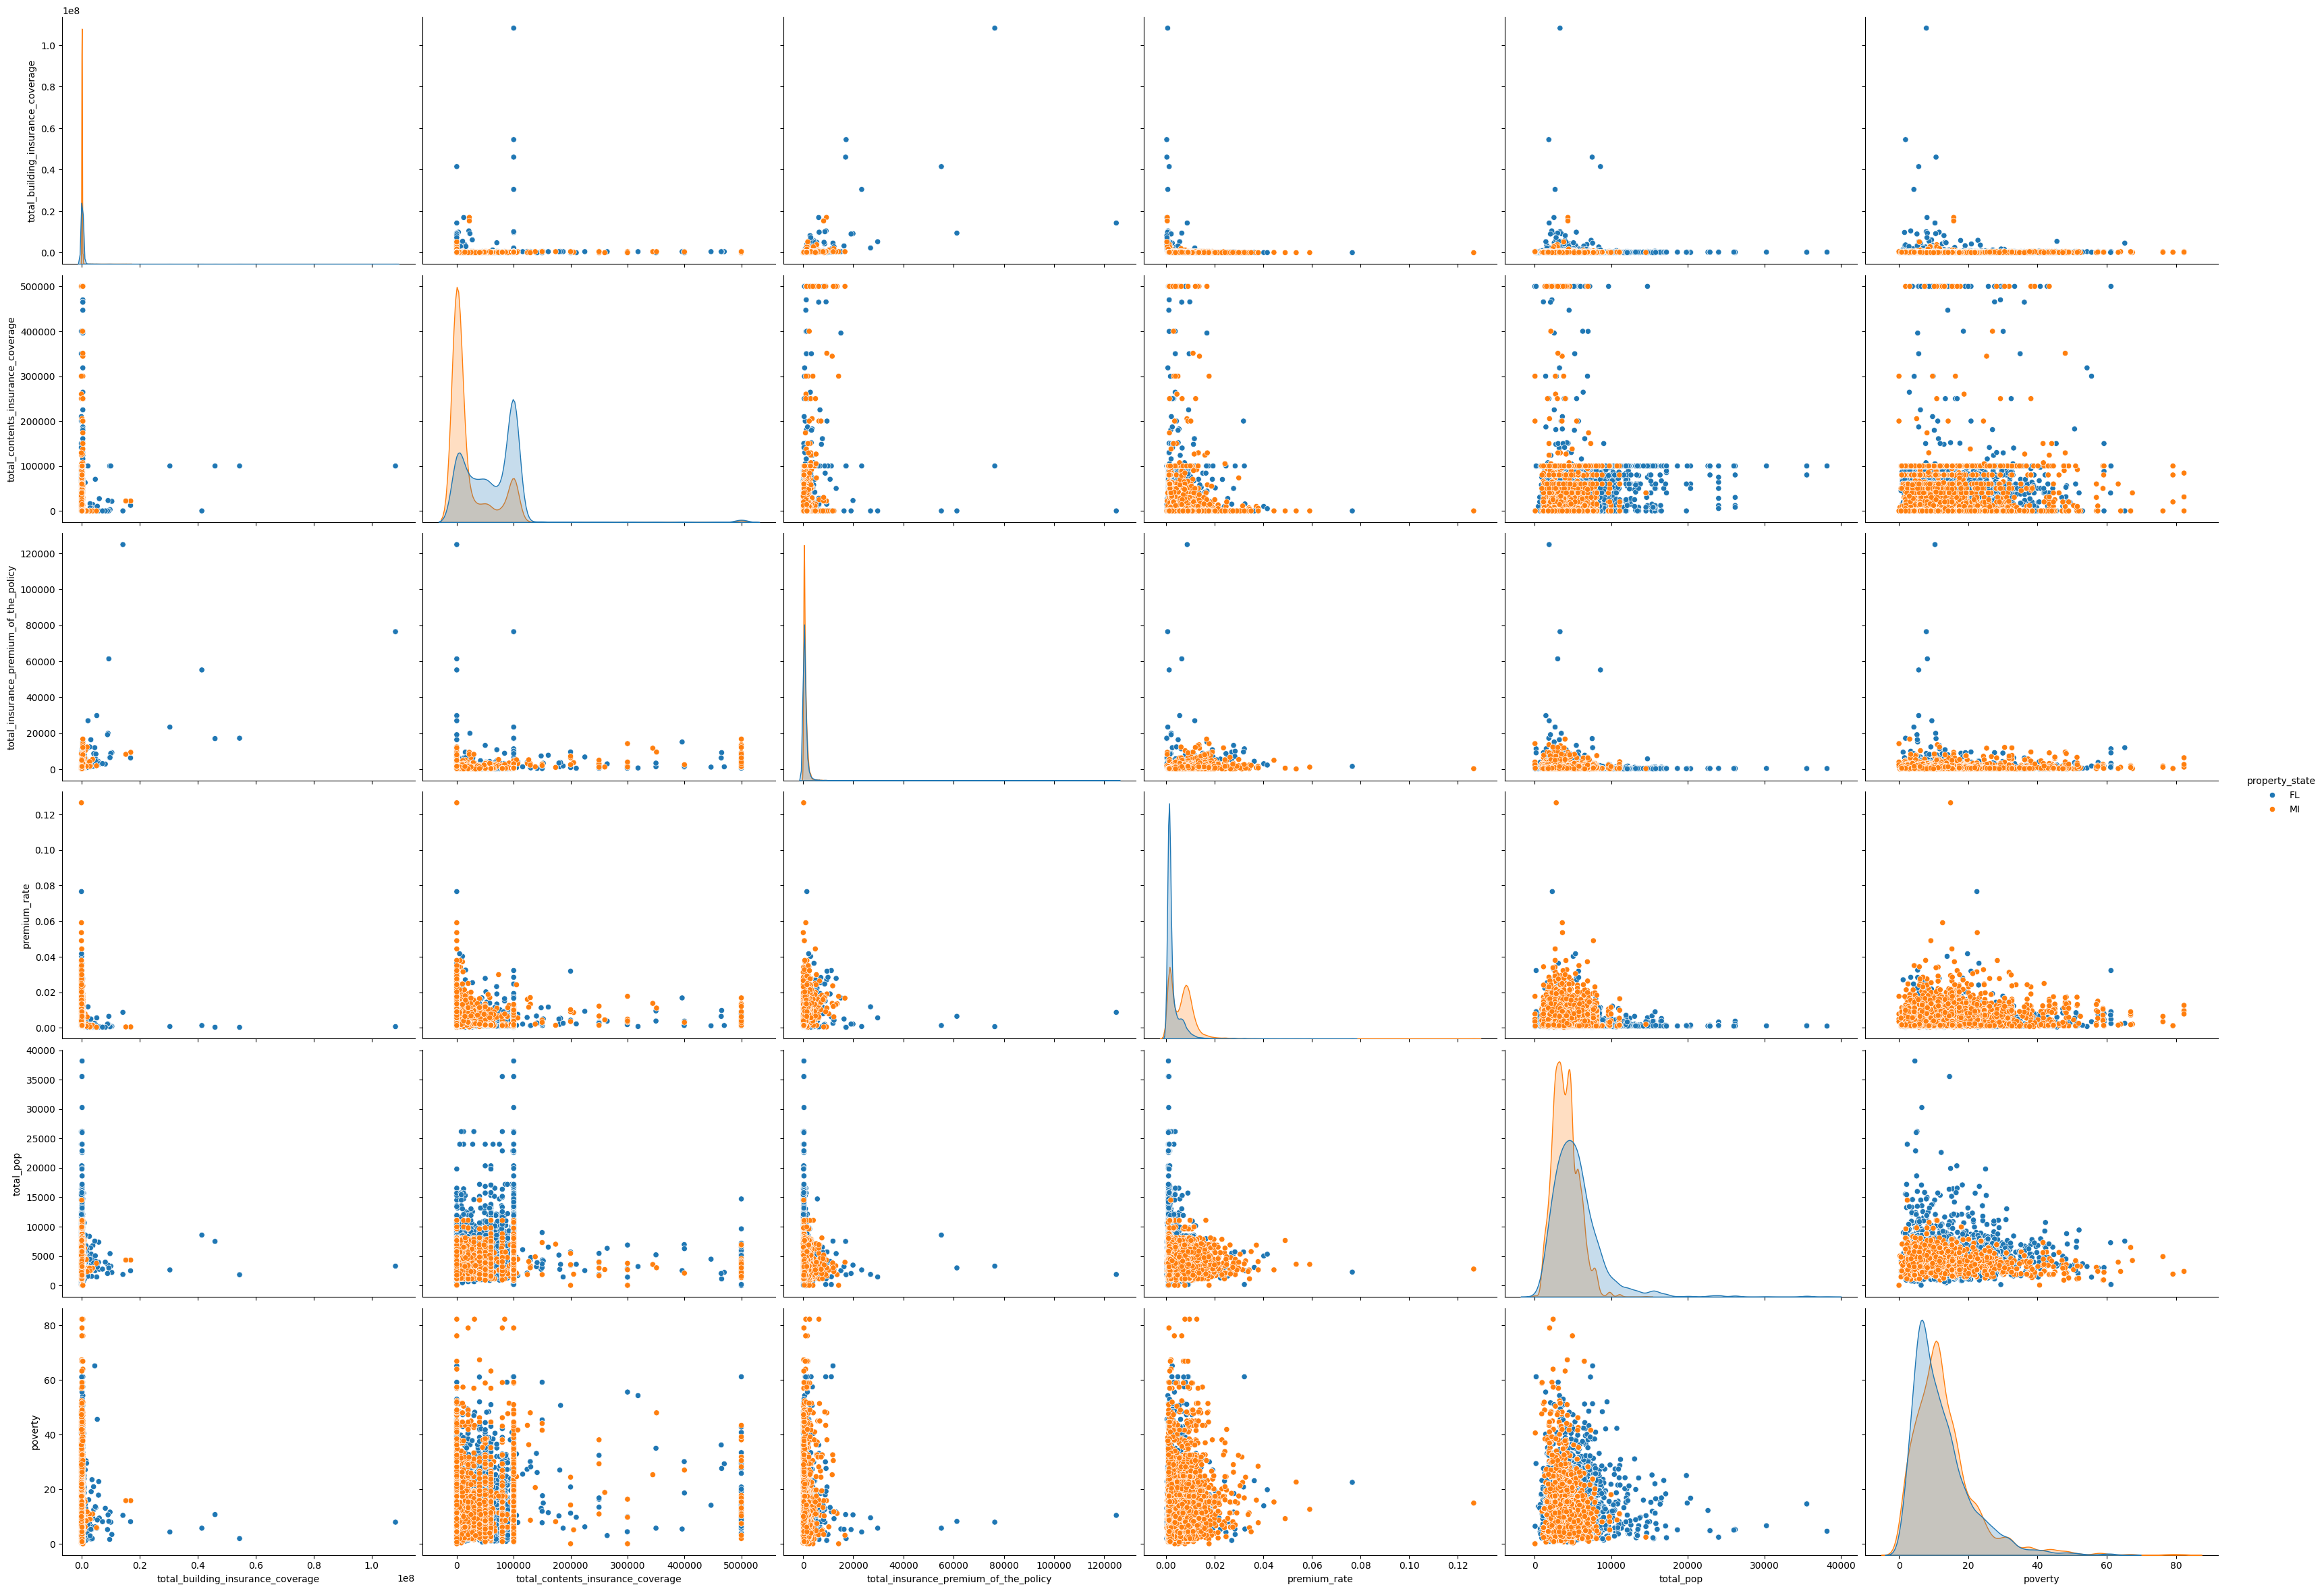

In [39]:
column_names = ["total_building_insurance_coverage", "total_contents_insurance_coverage",
                              "total_insurance_premium_of_the_policy", "premium_rate",
                              "total_pop", "poverty", "property_state"]

sns.pairplot(df_sample.loc[:,column_names], hue = "property_state", height = 4, aspect=1.4)

### Description of Sample Data Flordia

In [40]:
(df_sample[df_sample['property_state'] == 'FL']
          [column_names]
          .describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
          .apply(lambda s: s.apply('{0:.2f}'.format))
)

total_building_insurance_coverage total_contents_insurance_coverage  \
count                           5000.00                           5000.00   
mean                          320047.50                          63455.44   
std                          2054081.22                          57940.19   
min                                0.00                              0.00   
5%                             30000.00                              0.00   
25%                           155750.00                          20000.00   
50%                           250000.00                          65550.00   
75%                           250000.00                         100000.00   
95%                           425045.00                         100000.00   
99%                          2000000.00                         264653.00   
max                        108220500.00                         500000.00   

      total_insurance_premium_of_the_policy premium_rate total_pop  poverty  
count                               5000.00      5000.00   4997.00  4995.00  
mean                                 779.18         0.00   5495.61    12.23  
std                                 2687.13         0.00   3388.49     8.54  
min                                   13.00         0.00      0.00     0.60  
5%                                   192.00         0.00   1757.00     2.90  
25%                                  326.00         0.00   3397.00     6.30  
50%                                  376.00         0.00   4898.00    10.20  
75%                                  611.00         0.00   6645.00    15.60  
95%                                 2129.45         0.01  10922.00    28.70  
99%                                 6055.27         0.01  17201.00    42.31  
max                               124811.00         0.08  38169.00    65.20

Most variables are extreamly skewed.

### Description of Sample Data Michigan


In [41]:
(df_sample[df_sample['property_state'] == 'MI']
          [column_names]
          .describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
          .apply(lambda s: s.apply('{0:.2f}'.format))
)

total_building_insurance_coverage total_contents_insurance_coverage  \
count                           5000.00                           5000.00   
mean                          166497.80                          24204.36   
std                           361029.78                          51095.71   
min                                0.00                              0.00   
5%                             24200.00                              0.00   
25%                            76000.00                              0.00   
50%                           142000.00                              0.00   
75%                           250000.00                          30000.00   
95%                           250000.00                         100000.00   
99%                           500000.00                         100050.00   
max                         17000000.00                         500000.00   

      total_insurance_premium_of_the_policy premium_rate total_pop  poverty  
count                               5000.00      5000.00   4999.00  4997.00  
mean                                 883.95         0.01   4027.58    13.13  
std                                 1004.08         0.01   1633.05     9.39  
min                                   16.00         0.00     30.00     0.00  
5%                                   203.00         0.00   1652.00     2.08  
25%                                  374.00         0.00   2801.00     7.40  
50%                                  579.00         0.01   3837.00    11.30  
75%                                 1095.00         0.01   4888.00    15.90  
95%                                 2281.10         0.01   6898.00    31.32  
99%                                 5073.38         0.02   8096.00    48.00  
max                                16710.00         0.13  14512.00    82.30

Also very skewed data.

# Filter Sample Data

In [42]:
df_numeric = df_sample[column_names].select_dtypes(include=np.number)
df_filtered = df_sample[column_names]
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

bool_filter = ((df_numeric >= lower_bound) & (df_numeric <= upper_bound)).all(axis=1)

df_filtered = df_filtered[bool_filter]

# Describe New Filtered Sample Data

In [43]:
df_filtered.shape

(9096, 7)

In [62]:
(df_filtered[column_names]
          .describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
          .apply(lambda s: s.apply('{0:.2f}'.format))
)

total_building_insurance_coverage total_contents_insurance_coverage  \
count                           9096.00                           9096.00   
mean                          173110.75                          40774.74   
std                            87746.22                          43231.16   
min                                0.00                              0.00   
5%                             27475.00                              0.00   
25%                           100000.00                              0.00   
50%                           190050.00                          22950.00   
75%                           250000.00                         100000.00   
95%                           250000.00                         100000.00   
99%                           500000.00                         100000.00   
max                           611100.00                         350000.00   

      total_insurance_premium_of_the_policy premium_rate total_pop  poverty  
count                               9096.00      9096.00   9096.00  9096.00  
mean                                 623.28         0.00   4598.35    11.96  
std                                  465.09         0.00   2053.04     7.24  
min                                   13.00         0.00     30.00     0.00  
5%                                   193.00         0.00   1766.00     2.60  
25%                                  335.00         0.00   3080.00     6.50  
50%                                  412.00         0.00   4340.00    10.70  
75%                                  795.00         0.01   5720.00    15.40  
95%                                 1668.00         0.01   8379.00    26.60  
99%                                 2150.05         0.02  10922.00    34.00  
max                                 2356.00         0.02  12560.00    38.50

### Pair Plots for New Filtered Sampled Data

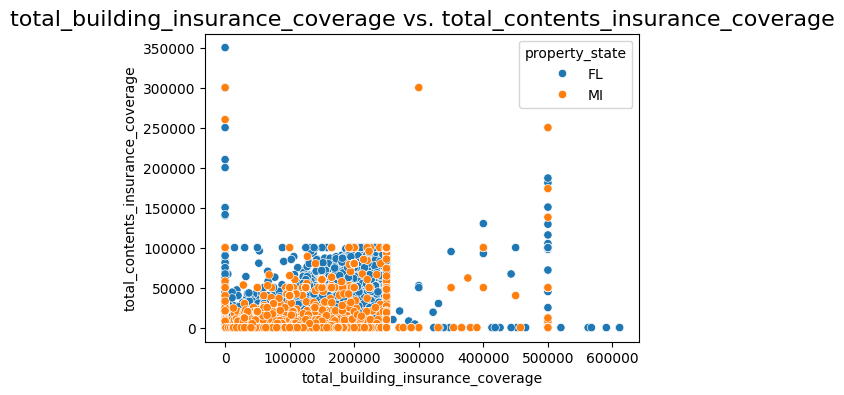

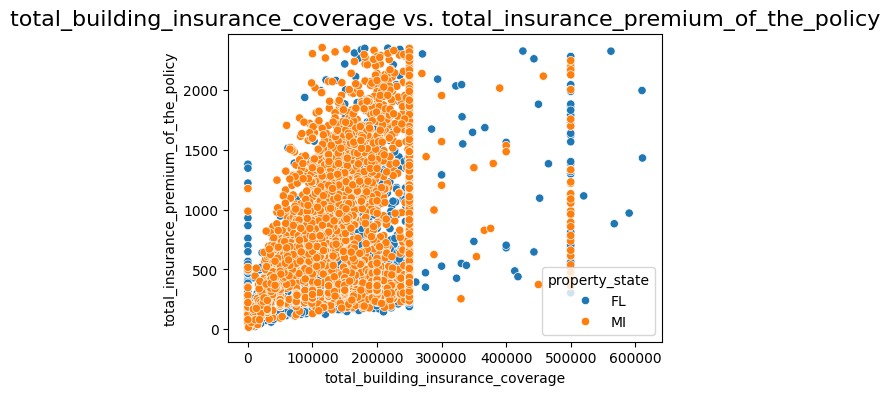

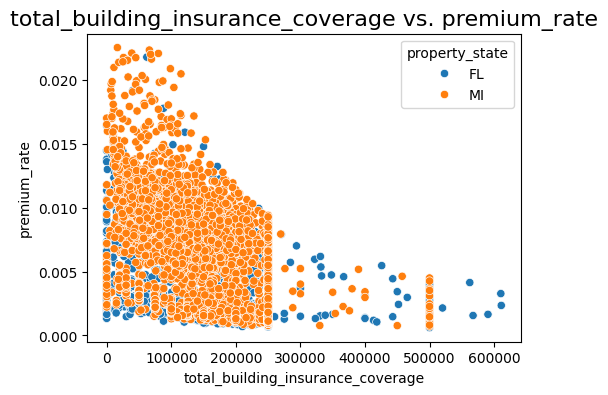

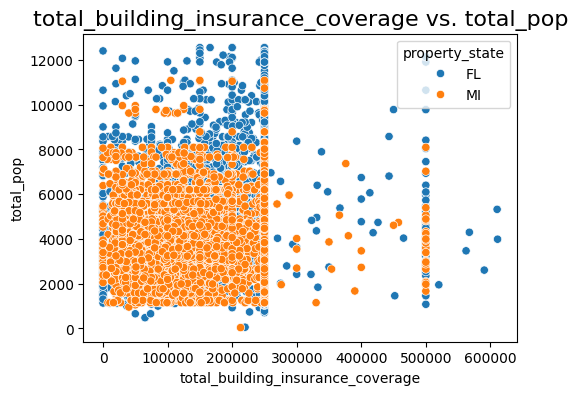

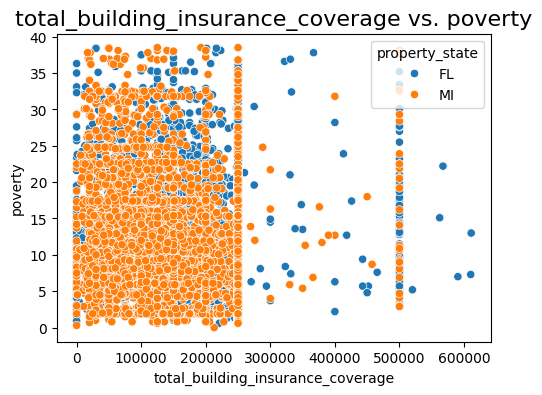

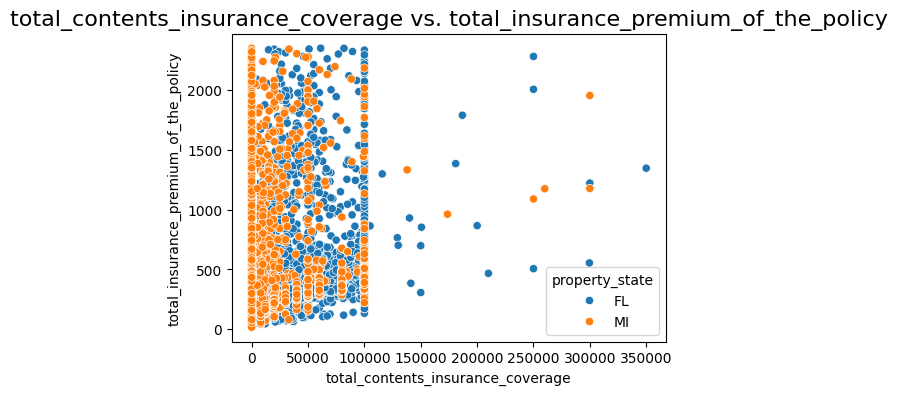

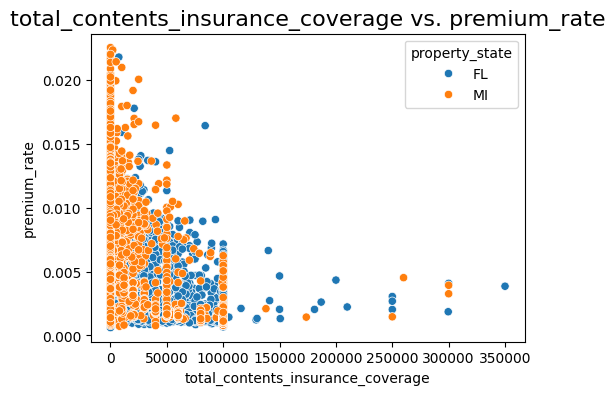

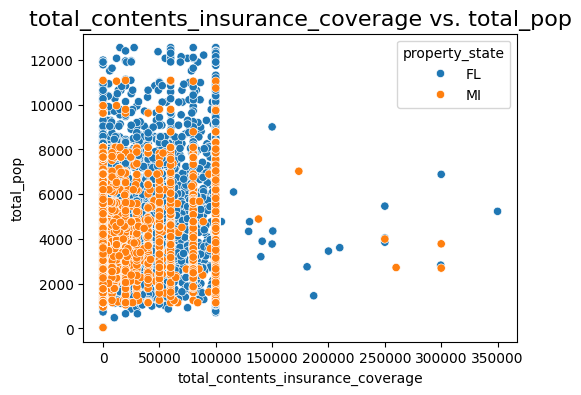

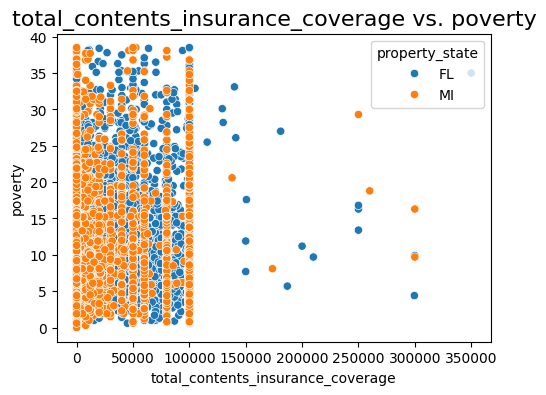

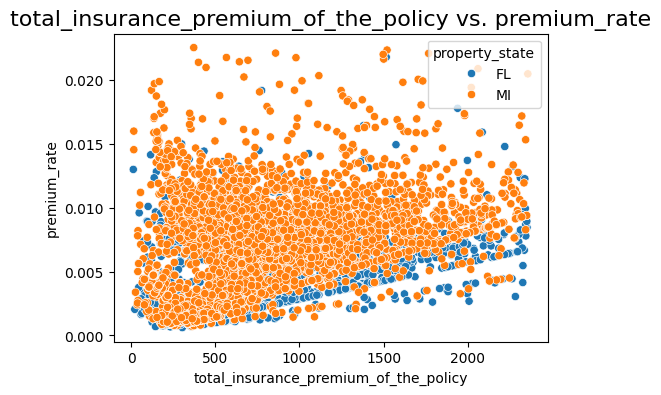

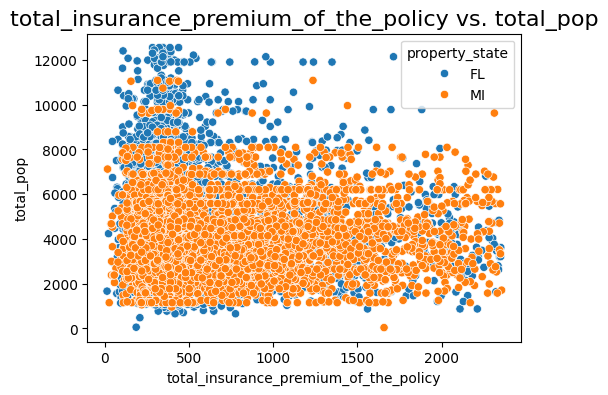

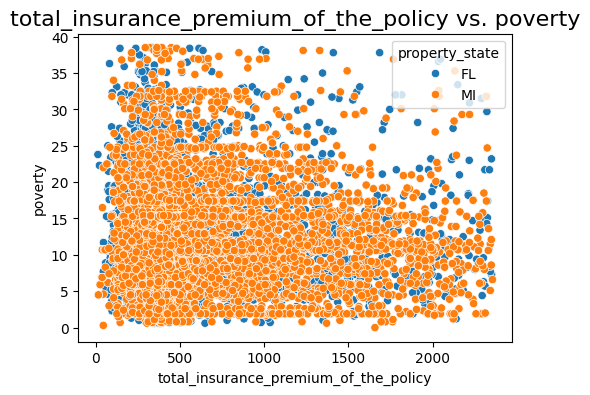

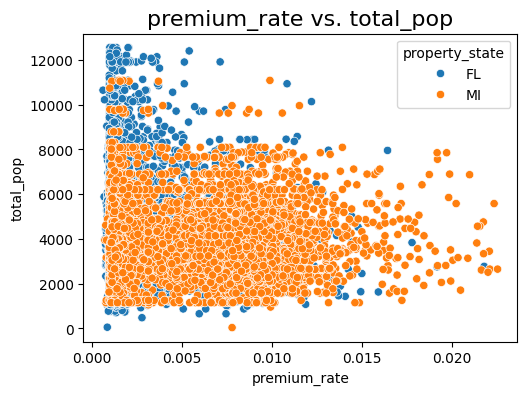

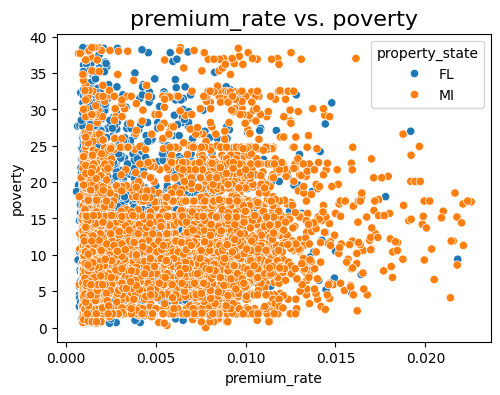

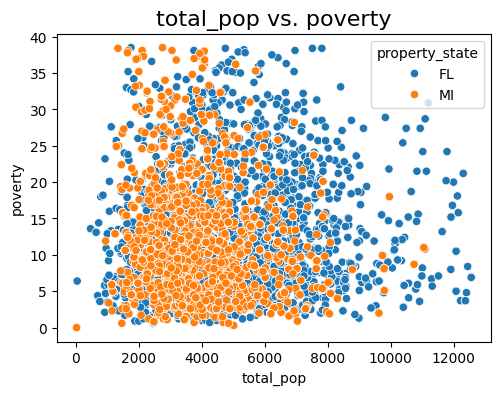

In [44]:
columns_numeric = column_names.copy()
columns_numeric.remove('property_state')
column_pairs = list(itertools.combinations(columns_numeric,2))

for col1, col2 in column_pairs:
    fig_height = 4
    fig_width = fig_height * 1.4

    plt.figure(figsize=(fig_width, fig_height))
    ax = sns.scatterplot(
        data = df_filtered,
        x = col1,
        y = col2,
        hue = "property_state"
    )
    ax.set_title(f'{col1} vs. {col2}', fontsize = 16)
    plt.show()
